In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-data/fake_reg.csv


In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv("../input/regression-data/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In this data set we will try to predict price according to two feature that are not specified

So it is a supervised learning problem

# 1. Exploratory Data Analysis:

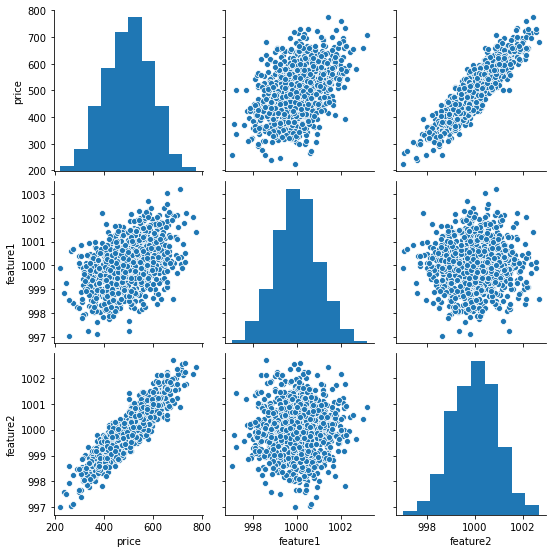

In [4]:
sns.pairplot(df)

From the plots above, we understand that all the data is normally distributed and there is strong positive correlation between feature 2 and price

First we will use normal machine learning algortihms before deep learning in order to compare results

In [5]:
X=df[["feature1","feature2"]]
X

,feature1,feature2
0,999.787558,999.766096
1,998.861615,1001.042403
2,1000.070267,998.844015
3,999.952251,1000.440940
4,1000.446011,1000.338531
...,...,...
995,1000.018988,999.672732
996,998.855379,1000.020026
997,1001.451646,998.847606
998,1000.771023,998.562851


In [6]:
y=df["price"] #This is our target value to predict
y

0      461.527929
1      548.130011
2      410.297162
3      540.382220
4      546.024553
          ...    
995    476.526078
996    457.313186
997    456.720992
998    403.315576
999    599.367093
Name: price, Length: 1000, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)
#here we divide our data as %70 train set and %30 test set

In [9]:
from sklearn.linear_model import LinearRegression
#First we will use linear regression and examine its performance

In [10]:
model1=LinearRegression()

In [11]:
model1.fit(X_train,y_train)
# Here we make our model fit the train data

LinearRegression()

In [12]:
predictions1=model1.predict(X_test)

In [13]:
predictions1 #This is predictions of the linear regression algorithm

array([505.11301707, 430.16341064, 523.59030783, 530.32590278,
       437.54734116, 550.19027441, 570.21662778, 442.49910837,
       511.54153444, 416.73480941, 562.96961958, 770.77443388,
       480.69796045, 611.01518296, 459.56654393, 474.16617009,
       630.31951711, 432.99513004, 358.60271296, 573.74251285,
       251.20546374, 550.55757852, 607.6684737 , 579.13411073,
       563.66522135, 452.61210691, 463.54774104, 682.79512027,
       541.57090642, 371.17138191, 526.84076386, 337.44754698,
       550.91294251, 446.20738198, 372.19330271, 482.38420887,
       573.97819687, 447.81963965, 455.61362207, 645.74130274,
       417.06944922, 495.70153233, 530.56315328, 410.91518504,
       541.86848532, 449.2562289 , 609.69591637, 409.08906937,
       679.14451065, 509.53865168, 720.82176857, 361.35804624,
       503.43259365, 446.4585715 , 498.90329202, 502.53857027,
       599.07378276, 540.81494291, 379.58822463, 514.74754076,
       460.53240933, 378.3397701 , 402.44629561, 425.40

Now we will evaluate the performance of the linear regression

In [14]:
from sklearn import metrics

In [15]:
metrics.mean_absolute_error(y_test,predictions1)

3.990615316182315

In [16]:
metrics.mean_squared_error(y_test,predictions1)

24.51243920706268

In [17]:
np.sqrt(metrics.mean_squared_error(y_test,predictions1))

4.951003858518258

Now we will visualize to understand our model's performance

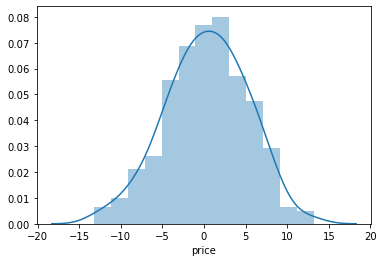

In [18]:
sns.distplot((y_test-predictions1))

In [19]:
sns.set_style("whitegrid")

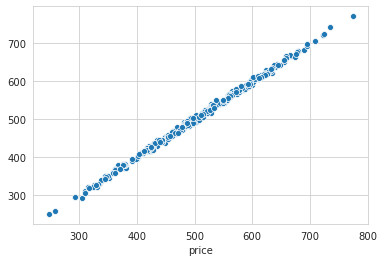

In [20]:
sns.scatterplot(y_test,predictions1)

In [21]:
import matplotlib.pyplot as plt

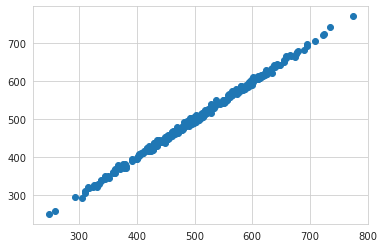

In [22]:
plt.scatter(y_test,predictions1)

As we can see from the plots above, the predictions of linear regression is very good

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model2=DecisionTreeRegressor()

In [25]:
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
predictions2=model2.predict(X_test)
predictions2

array([501.81396346, 433.99838446, 524.38393835, 529.71971585,
       441.90522674, 558.87741587, 565.19184559, 439.09025956,
       507.09798982, 413.87226234, 562.00257647, 760.65101669,
       476.52607826, 610.29650189, 443.80983891, 477.25839763,
       646.42137115, 441.38724011, 367.88456147, 579.43065472,
       239.65626376, 542.99539996, 625.08018462, 570.6460653 ,
       565.07689035, 451.8041724 , 461.49048992, 670.21237633,
       533.55074599, 357.11605236, 536.59066876, 352.28258718,
       544.49878325, 452.73449935, 371.22410361, 475.17585767,
       577.58298501, 450.85178618, 456.89995237, 646.42137115,
       408.12200074, 487.7379163 , 528.12861343, 396.05573683,
       545.58520276, 425.84365096, 603.66990347, 408.12200074,
       617.61509904, 502.90170221, 711.65777328, 357.82557519,
       514.69378589, 450.85178618, 503.39000141, 505.69270877,
       602.12024979, 532.62879772, 397.62059618, 512.04979227,
       456.98761551, 378.79339707, 396.04998476, 429.47

In [27]:
print("Predictions of Decision Tree Regression:",metrics.mean_absolute_error(y_test,predictions2))

print("Predictions of Linear Regression:",metrics.mean_absolute_error(y_test,predictions1))

Predictions of Decision Tree Regression: 8.99344094651434
Predictions of Linear Regression: 3.990615316182315


In [28]:
print("Predictions of Decision Tree Regression:",metrics.mean_squared_error(y_test,predictions2))

print("Predictions of Linear Regression:",metrics.mean_squared_error(y_test,predictions1))

Predictions of Decision Tree Regression: 149.27975438781561
Predictions of Linear Regression: 24.51243920706268


Linear regression algorithm performs better than decision tree regression algorithm

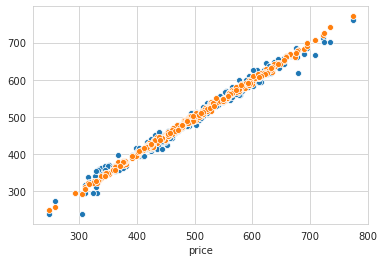

In [29]:
sns.scatterplot(y_test,predictions2)
sns.scatterplot(y_test,predictions1)

Now we will use deep learning algortihm and will compare results with the previous one

In [30]:
#Before using deep learning algorithms we have to transform our data into numpy arrays
X_deep=X.values
X_deep

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [31]:
y_deep=y.values
y_deep

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [32]:
X_deep_train, X_deep_test, y_deep_train, y_deep_test=train_test_split(X_deep, y_deep,test_size=0.3)
X_deep_train

array([[1000.63022276,  999.18669104],
       [ 999.62911717,  999.54799684],
       [1001.3763618 ,  999.52404506],
       ...,
       [ 999.03476362, 1001.58003678],
       [ 999.09490143, 1000.23959687],
       [1000.10489972,  999.99785023]])

In [33]:
X_deep_test.shape

(300, 2)

In [34]:
X_deep_train.shape

(700, 2)

Because the weights are very important in neural networks, we need to scale our train data in order to standardize it, but we can not standardize our test set because it will be a cheating

In [35]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.

In [36]:
scaler=MinMaxScaler()

In [37]:
scaler.fit(X_deep_train)

MinMaxScaler()

In [38]:
X_deep_train= scaler.transform(X_deep_train)
X_deep_test=scaler.transform(X_deep_test)

In [39]:
from tensorflow.keras.models import Sequential
# this will create sequential layers


In [40]:
from tensorflow.keras.layers import Dense
#this will add dense layers
#In dense layers, every neuron is connected with the other neurons

# 1. Creating Layers:

In [41]:
model= Sequential([Dense(4,activation="relu"), Dense(4,activation="relu"),Dense(4,activation="relu"), Dense(1)])
#The last sould be assigned with respect to how many ourput we want to have
#In our example, because we want to predict hosue prices, we will use just 1 layer as the last layer

In [42]:
#There is another way to create the same model as follows:
model2=Sequential()
model2.add(Dense(4, activation="sigmoid"))
model2.add(Dense(4, activation="softplus"))
model2.add(Dense(1)) 

tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)


units represents how many neurons we want to have

activation represents which activation function we want to use


# 2. Choosing Right Optimizer and Cost Function:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Arguments:
        optimizer:this determines how we want to perform the gradient descent like adam optimizer
        loss= represents cost function we want to use
        

In [43]:
model.compile(optimizer="rmsprop", loss="mse")
#here we choose rmsprop as our optimizer and Mean Suared Error as our loss function

In [44]:
model2.compile(optimizer="rmsprop", loss="mse")

2.1. Choosing an optimizer:
Keep in mind what kind of problem we are trying to solve:

For a multi-class classification problem:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
              
For a binary classification problem:

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
              

For a mean squared error regression problem:

model.compile(optimizer='rmsprop',
              loss='mse')


2.2. Available optimizers:

The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction.

2.2.1.SGD:Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). 


2.2.2.RMSprop:Optimizer that implements the RMSprop algorithm.

The gist of RMSprop is to:

Maintain a moving (discounted) average of the square of gradients
Divide the gradient by the root of this average

2.2.3.Adam:Optimizer that implements the Adam algorithm.

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.


2.2.4.Adadelta: Optimizer that implements the Adadelta algorithm.

Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:

The continual decay of learning rates throughout training
The need for a manually selected global learning rate

2.2.5.Adagrad:Optimizer that implements the Adagrad algorithm.

Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.


2.2.6.Adamax:Optimizer that implements the Adamax algorithm.

It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper. Adamax is sometimes superior to adam, specially in models with embeddings.


Nadam:Optimizer that implements the NAdam algorithm.

Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.

Ftrl:Optimizer that implements the FTRL algorithm.


2.3. Choosing Right Loss Function

Loss function is a mathematical way of measuring how wrong your predictions are.

Keep in mind what kind of problem you are trying to solve:

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# 3. Fitting Model and Training the Data:

In [45]:
model.fit(x=X_deep_train, y=y_deep_train,epochs=300)

Epoch 1/300
22/22 [==============================] - 0s 1ms/step - loss: 254112.9219
Epoch 2/300
22/22 [==============================] - 0s 1ms/step - loss: 254053.6875
Epoch 3/300
22/22 [==============================] - 0s 1ms/step - loss: 253994.6250
Epoch 4/300
22/22 [==============================] - 0s 1ms/step - loss: 253931.0156
Epoch 5/300
22/22 [==============================] - 0s 996us/step - loss: 253862.1250
Epoch 6/300
22/22 [==============================] - 0s 976us/step - loss: 253787.2656
Epoch 7/300
22/22 [==============================] - 0s 1ms/step - loss: 253706.1562
Epoch 8/300
22/22 [==============================] - 0s 988us/step - loss: 253617.9688
Epoch 9/300
22/22 [==============================] - 0s 1ms/step - loss: 253521.8438
Epoch 10/300
22/22 [==============================] - 0s 1ms/step - loss: 253417.2188
Epoch 11/300
22/22 [==============================] - 0s 960us/step - loss: 253303.4062
Epoch 12/300
22/22 [==============================] - 0

In [46]:
model.history.history 
#This function will show separately the history of the loss values

{'loss': [254112.921875,
  254053.6875,
  253994.625,
  253931.015625,
  253862.125,
  253787.265625,
  253706.15625,
  253617.96875,
  253521.84375,
  253417.21875,
  253303.40625,
  253179.609375,
  253045.25,
  252899.546875,
  252741.46875,
  252571.953125,
  252388.453125,
  252191.453125,
  251978.46875,
  251750.671875,
  251506.359375,
  251245.21875,
  250965.171875,
  250665.671875,
  250347.703125,
  250005.6875,
  249643.265625,
  249259.9375,
  248850.921875,
  248413.28125,
  247939.8125,
  247431.421875,
  246883.640625,
  246299.0625,
  245671.359375,
  244824.984375,
  243849.171875,
  242820.84375,
  241711.390625,
  240522.875,
  239247.515625,
  237889.421875,
  236434.109375,
  234895.046875,
  233250.3125,
  231505.046875,
  229652.828125,
  227698.65625,
  225625.515625,
  223446.0625,
  221147.46875,
  218729.515625,
  216192.6875,
  213541.21875,
  210752.703125,
  207846.125,
  204796.578125,
  201614.40625,
  198306.265625,
  194868.59375,
  191282.96875,
  1

In [47]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head() #we can create a pandas data frame in order to visualize the history of the loss function

,loss
0,254112.921875
1,254053.687500
2,253994.625000
3,253931.015625
4,253862.125000


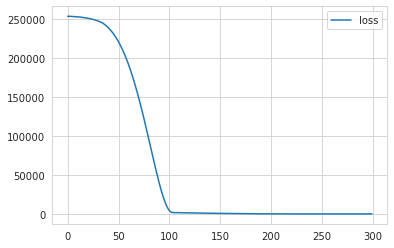

In [48]:
loss_df.plot()

This plot helps to understand better how the values in the loss function go down

In [49]:
model2.fit(x=X_deep_train, y=y_deep_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 950us/step - loss: 252036.9844
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 251808.5469
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 251587.2031
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 251354.2188
Epoch 5/250
22/22 [==============================] - 0s 945us/step - loss: 251108.5000
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 250849.3281
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 250576.2344
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 250286.8594
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 249982.2812
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 249659.8906
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 249317.8281
Epoch 12/250
22/22 [==============================] - 0s 94

In [50]:
model2.history.history

{'loss': [252036.984375,
  251808.546875,
  251587.203125,
  251354.21875,
  251108.5,
  250849.328125,
  250576.234375,
  250286.859375,
  249982.28125,
  249659.890625,
  249317.828125,
  248955.421875,
  248571.6875,
  248165.46875,
  247736.453125,
  247285.984375,
  246811.515625,
  246312.578125,
  245787.703125,
  245240.28125,
  244668.1875,
  244069.578125,
  243444.609375,
  242795.703125,
  242119.0625,
  241415.40625,
  240687.859375,
  239933.484375,
  239159.109375,
  238354.0625,
  237522.03125,
  236667.859375,
  235789.578125,
  234886.65625,
  233965.4375,
  233015.015625,
  232038.78125,
  231041.421875,
  230024.828125,
  228986.28125,
  227923.890625,
  226841.984375,
  225738.078125,
  224609.34375,
  223467.703125,
  222305.625,
  221123.390625,
  219924.953125,
  218704.984375,
  217464.0,
  216208.203125,
  214940.3125,
  213651.8125,
  212345.28125,
  211024.9375,
  209689.1875,
  208339.515625,
  206978.15625,
  205598.171875,
  204203.125,
  202798.265625,
 

In [51]:
loss_df2=pd.DataFrame(model2.history.history)
loss_df2.head()

,loss
0,252036.984375
1,251808.546875
2,251587.203125
3,251354.218750
4,251108.500000


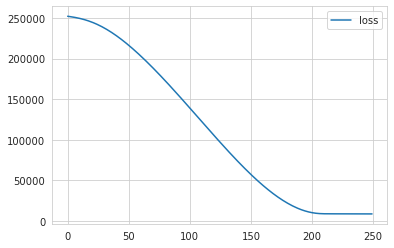

In [52]:
loss_df2.plot()

# 4. Evaluation of Our Model:

evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, return_dict=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Returns the loss value & metrics values for the model in test mode.

In [53]:
model.evaluate(X_deep_train, y_deep_train)

22/22 [==============================] - 0s 821us/step - loss: 23.8700


23.869997024536133

In [54]:
model.evaluate(X_deep_test, y_deep_test)

10/10 [==============================] - 0s 906us/step - loss: 25.9694


25.9693660736084

This means that our model have mean squared error as 26.748348236083984

In [55]:
model2.evaluate(X_deep_train, y_deep_train)

22/22 [==============================] - 0s 855us/step - loss: 8699.6367


8699.63671875

In [56]:
model2.evaluate(X_deep_test, y_deep_test)

10/10 [==============================] - 0s 887us/step - loss: 8422.8896


8422.8896484375

Now we will predict the y_test and compare them with the real values

In [57]:
predictions_deep1=model.predict(X_deep_test)
predictions_deep1

array([[562.8618 ],
       [480.0755 ],
       [395.84042],
       [356.79276],
       [610.5214 ],
       [624.7703 ],
       [405.37778],
       [546.6192 ],
       [577.10614],
       [452.01025],
       [423.1718 ],
       [437.47205],
       [502.59137],
       [566.091  ],
       [471.70618],
       [647.81464],
       [549.4591 ],
       [471.31027],
       [634.5357 ],
       [645.2316 ],
       [555.59827],
       [589.0778 ],
       [401.92   ],
       [681.16125],
       [444.29205],
       [528.53864],
       [349.7066 ],
       [629.81866],
       [438.7387 ],
       [481.02237],
       [502.3639 ],
       [512.1663 ],
       [517.0192 ],
       [524.85345],
       [387.9076 ],
       [677.0422 ],
       [459.7814 ],
       [551.58984],
       [424.9416 ],
       [431.84   ],
       [445.6091 ],
       [475.34512],
       [343.13724],
       [439.1688 ],
       [534.91455],
       [597.77075],
       [640.9687 ],
       [584.81665],
       [598.5627 ],
       [604.6746 ],


In [58]:
predictions_deep1_df=pd.DataFrame(predictions_deep1, columns=["Model Predictiions"])
predictions_deep1_df.head()

,Model Predictiions
0,562.861816
1,480.075500
2,395.840424
3,356.792755
4,610.521423


In [59]:
y_test_df=pd.DataFrame(y_deep_test, columns=["Real Prices"])
y_test_df.head()

,Real Prices
0,553.324198
1,475.946996
2,399.746909
3,357.295914
4,613.426629


In [60]:
comparison_df=pd.concat([predictions_deep1_df, y_test_df], axis=1)
comparison_df.head()


,Model Predictiions,Real Prices
0,562.861816,553.324198
1,480.075500,475.946996
2,395.840424,399.746909
3,356.792755,357.295914
4,610.521423,613.426629


Above we can see the compared results of our model's predictions and real prices 

In [61]:
print("Predictions of Decision Tree Regression:",metrics.mean_absolute_error(y_test,predictions2))

print("Predictions of Linear Regression:",metrics.mean_absolute_error(y_test,predictions1))
print("Predictions of Deep Learning Model:",metrics.mean_absolute_error(y_deep_test,predictions_deep1))


Predictions of Decision Tree Regression: 8.99344094651434
Predictions of Linear Regression: 3.990615316182315
Predictions of Deep Learning Model: 4.073785172593295


The error above show that deep learning model has a error value around 4 dolars from the real prices like Linear regression, but when it comes to Decision tree model it is about 9.5 dolar off from the real prices. The mean of the prices is 498 and our model's prediction is less then %1 and it predicts very good.

In [62]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [63]:
print("Predictions of Decision Tree Regression:",metrics.mean_squared_error(y_test,predictions2))

print("Predictions of Linear Regression:",metrics.mean_squared_error(y_test,predictions1))
print("Predictions of Deep Learning Model:",metrics.mean_squared_error(y_deep_test,predictions_deep1))
print("The Evaluation Mean Squared Error of Our Deep Learning Model :",model.evaluate(X_deep_test, y_deep_test))

Predictions of Decision Tree Regression: 149.27975438781561
Predictions of Linear Regression: 24.51243920706268
Predictions of Deep Learning Model: 25.969355584608675
10/10 [==============================] - 0s 1ms/step - loss: 25.9694
The Evaluation Mean Squared Error of Our Deep Learning Model : 25.9693660736084


In [64]:
predictions_deep_1_dimesional=predictions_deep1.reshape(300,)
predictions_deep_1_dimesional.shape

(300,)

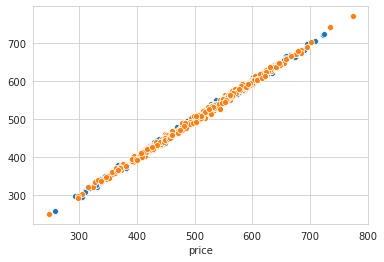

In [65]:
sns.scatterplot(y_test,predictions1, legend="full")
sns.scatterplot(y_deep_test,predictions_deep_1_dimesional, legend="full")
#Here is the comparison of the predictions of Linear regression and Deep Learning Model, 
#it is very similar but deep learning performs better with larger datasets

When we have new data and try to find which we should determine for these data, we can use model.predict() method for new prices as follows:

In [66]:
new_features=[[998,1000]]
new_features=scaler.transform(new_features)#we have to tranform it because our model used scaled data
new_features


array([[0.15312457, 0.53968792]])

In [67]:
model.predict(new_features)
#Accoding to these feature, the prices should be 420.54 according to our model

array([[419.24976]], dtype=float32)

In [68]:
new_features2=[[1000,998]]
new_features2=scaler.transform(new_features2)
model.predict(new_features2)

array([[322.44614]], dtype=float32)

#Accoding to these feature, the prices should be 323.56 according to our model

We understand that feature 2 affect much more than feature 1 because I got lower price when exchanged the same values in the first new data.

# 5. Saving Our Model for Future Use

we can save our model and download it later if we aim to use it in the future

In [69]:
from tensorflow.keras.models import load_model

save(filepath, overwrite=True, include_optimizer=True, save_format=None, signatures=None, options=None) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Saves the model to Tensorflow SavedModel or a single HDF5 file.
    
    The savefile includes:
    
    - The model architecture, allowing to re-instantiate the model.
    - The model weights.
    - The state of the optimizer, allowing to resume training
        exactly where you left off.
    
    This allows you to save the entirety of the state of a model
    in a single file.

In [70]:
model.save("my_price_pridecition_model.h5")

In [71]:
my_model_back=load_model("my_price_pridecition_model.h5")

Here we load our saved model and reuse it

In [72]:
my_model_back.predict(new_features)

array([[419.24976]], dtype=float32)

Here I reuse my model and get actual the same prediction for new features